In [14]:
# Code Block 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

In [15]:
# Code Block 2: Activation Function Definitions
def step_function(x):
    """Returns 1 if x >= 0, else 0."""
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    """Binary Sigmoid function: maps input to a range between 0 and 1."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    """
    Hyperbolic Tangent (Tanh) function: maps input to a range between -1 and 1.
    This is also known as a 'Bipolar Sigmoid' function.
    """
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of the Tanh function."""
    return 1 - np.tanh(x)**2

def relu(x):
    """Rectified Linear Unit (ReLU) function: returns max(0, x)."""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of the ReLU function."""
    return np.where(x > 0, 1, 0)

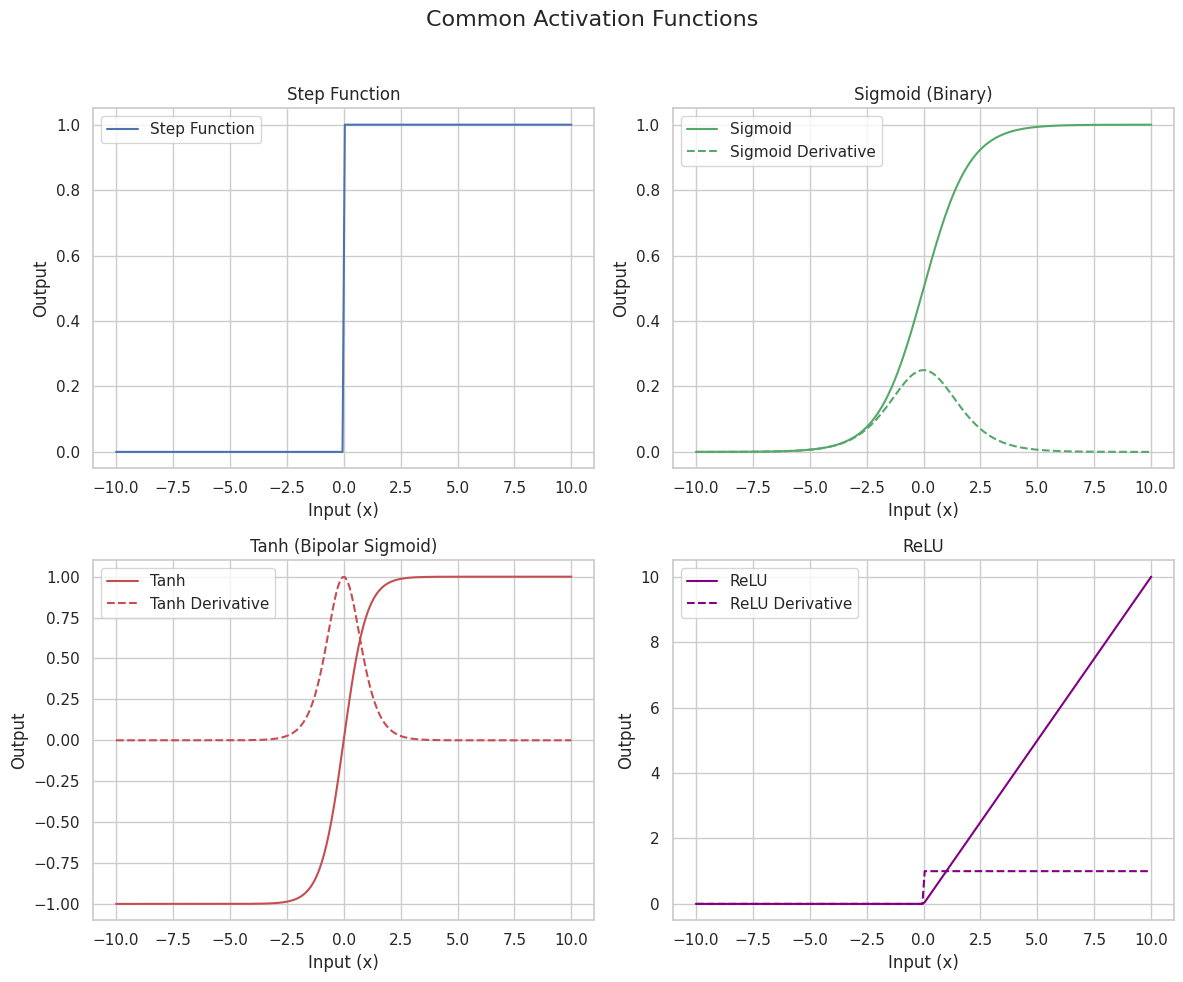

In [16]:
# Code Block 3: Visualization
# Generate a range of input values
x = np.linspace(-10, 10, 200)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Common Activation Functions', fontsize=16)

# Step Function
axs[0, 0].plot(x, step_function(x), label='Step Function', color='b')
axs[0, 0].set_title('Step Function')
axs[0, 0].legend()

# Sigmoid Function
axs[0, 1].plot(x, sigmoid(x), label='Sigmoid', color='g')
axs[0, 1].plot(x, sigmoid_derivative(x), label='Sigmoid Derivative', color='g', linestyle='--')
axs[0, 1].set_title('Sigmoid (Binary)')
axs[0, 1].legend()

# Tanh Function
axs[1, 0].plot(x, tanh(x), label='Tanh', color='r')
axs[1, 0].plot(x, tanh_derivative(x), label='Tanh Derivative', color='r', linestyle='--')
axs[1, 0].set_title('Tanh (Bipolar Sigmoid)')
axs[1, 0].legend()

# ReLU Function
axs[1, 1].plot(x, relu(x), label='ReLU', color='purple')
axs[1, 1].plot(x, relu_derivative(x), label='ReLU Derivative', color='purple', linestyle='--')
axs[1, 1].set_title('ReLU')
axs[1, 1].legend()

# Add labels and grid to all subplots
for ax in axs.flat:
    ax.set_xlabel('Input (x)')
    ax.set_ylabel('Output')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [17]:
# Code Block 4 (Final Corrected Version): Neural Network Class
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate=0.1):
        # Network architecture
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.weights_ih = np.random.uniform(-1, 1, (self.hidden_nodes, self.input_nodes))
        self.weights_ho = np.random.uniform(-1, 1, (self.output_nodes, self.hidden_nodes))
        self.bias_h = np.random.uniform(-1, 1, (self.hidden_nodes, 1))
        self.bias_o = np.random.uniform(-1, 1, (self.output_nodes, 1))
        
        self.activation = 'sigmoid' # Default activation

    def _apply_activation(self, x, derivative=False):
        if self.activation == 'sigmoid':
            if derivative: return sigmoid_derivative(x)
            return sigmoid(x)
        elif self.activation == 'tanh':
            if derivative: return tanh_derivative(x)
            return tanh(x)
        elif self.activation == 'relu':
            if derivative: return relu_derivative(x)
            return relu(x)

    def feedforward(self, inputs):
        # --- FIX 1 ---
        # This method now assumes 'inputs' is already a correctly shaped column vector.
        # The line that reshaped the input has been removed.

        # Calculate signals into hidden layer
        hidden_inputs = np.dot(self.weights_ih, inputs) + self.bias_h
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self._apply_activation(hidden_inputs)

        # Calculate signals into final output layer
        final_inputs = np.dot(self.weights_ho, hidden_outputs) + self.bias_o
        # Calculate the signals emerging from final output layer
        final_outputs = sigmoid(final_inputs) # Sigmoid for binary classification output

        return hidden_outputs, final_outputs

    def train(self, inputs_list, targets_list, activation='sigmoid'):
        self.activation = activation
        
        # --- FIX 2 ---
        # Convert inputs and targets to correctly shaped column vectors at the start.
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # --- Feedforward ---
        # The correctly shaped 'inputs' is passed to feedforward.
        hidden_outputs, final_outputs = self.feedforward(inputs)

        # --- Backpropagation ---
        output_errors = targets - final_outputs
        gradients_o = output_errors * sigmoid_derivative(final_outputs)
        weights_ho_delta = self.learning_rate * np.dot(gradients_o, hidden_outputs.T)
        
        self.weights_ho += weights_ho_delta
        self.bias_o += self.learning_rate * gradients_o

        hidden_errors = np.dot(self.weights_ho.T, output_errors)
        gradients_h = hidden_errors * self._apply_activation(hidden_outputs, derivative=True)
        
        # The 'inputs' variable is now correctly shaped (2,1), so its transpose is (1,2).
        # np.dot((4,1), (1,2)) -> (4,2), which is the correct shape for the weight update.
        weights_ih_delta = self.learning_rate * np.dot(gradients_h, inputs.T)

        self.weights_ih += weights_ih_delta
        self.bias_h += self.learning_rate * gradients_h
        
    def predict(self, inputs_list):
        # --- FIX 3 ---
        # The predict method must also shape its input before calling feedforward.
        inputs = np.array(inputs_list, ndmin=2).T
        _, final_outputs = self.feedforward(inputs)
        return final_outputs

In [18]:
# Code Block 5: XOR Data and Training Loop

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Training parameters
epochs = 10000
activations_to_test = ['sigmoid', 'tanh', 'relu']
all_errors = {}

for activation_func in activations_to_test:
    print(f"--- Training with {activation_func.upper()} activation ---")
    
    # Initialize the network
    # 2 input nodes, 4 hidden nodes, 1 output node
    nn = NeuralNetwork(input_nodes=2, hidden_nodes=4, output_nodes=1, learning_rate=0.1)
    
    errors = []
    for e in range(epochs):
        epoch_error = 0
        for i in range(len(X_xor)):
            nn.train(X_xor[i], y_xor[i], activation=activation_func)
            # Calculate error for plotting
            prediction = nn.predict(X_xor[i])
            epoch_error += np.mean((y_xor[i] - prediction) ** 2) # Mean Squared Error
        
        errors.append(epoch_error / len(X_xor))
    
    all_errors[activation_func] = errors
    
    # Test the network
    print("Test Results:")
    for i in range(len(X_xor)):
        prediction = nn.predict(X_xor[i])
        print(f"Input: {X_xor[i]}, Target: {y_xor[i][0]}, Predicted: {prediction[0][0]:.4f} -> Rounded: {round(prediction[0][0])}")
    print("-" * 40)

--- Training with SIGMOID activation ---
Test Results:
Input: [0 0], Target: 0, Predicted: 0.4597 -> Rounded: 0
Input: [0 1], Target: 1, Predicted: 0.6077 -> Rounded: 1
Input: [1 0], Target: 1, Predicted: 0.4544 -> Rounded: 0
Input: [1 1], Target: 0, Predicted: 0.3459 -> Rounded: 0
----------------------------------------
--- Training with TANH activation ---
Test Results:
Input: [0 0], Target: 0, Predicted: 0.0019 -> Rounded: 0
Input: [0 1], Target: 1, Predicted: 0.9963 -> Rounded: 1
Input: [1 0], Target: 1, Predicted: 0.9963 -> Rounded: 1
Input: [1 1], Target: 0, Predicted: 0.0035 -> Rounded: 0
----------------------------------------
--- Training with RELU activation ---
Test Results:
Input: [0 0], Target: 0, Predicted: 0.5015 -> Rounded: 1
Input: [0 1], Target: 1, Predicted: 0.9998 -> Rounded: 1
Input: [1 0], Target: 1, Predicted: 0.5015 -> Rounded: 1
Input: [1 1], Target: 0, Predicted: 0.0003 -> Rounded: 0
----------------------------------------


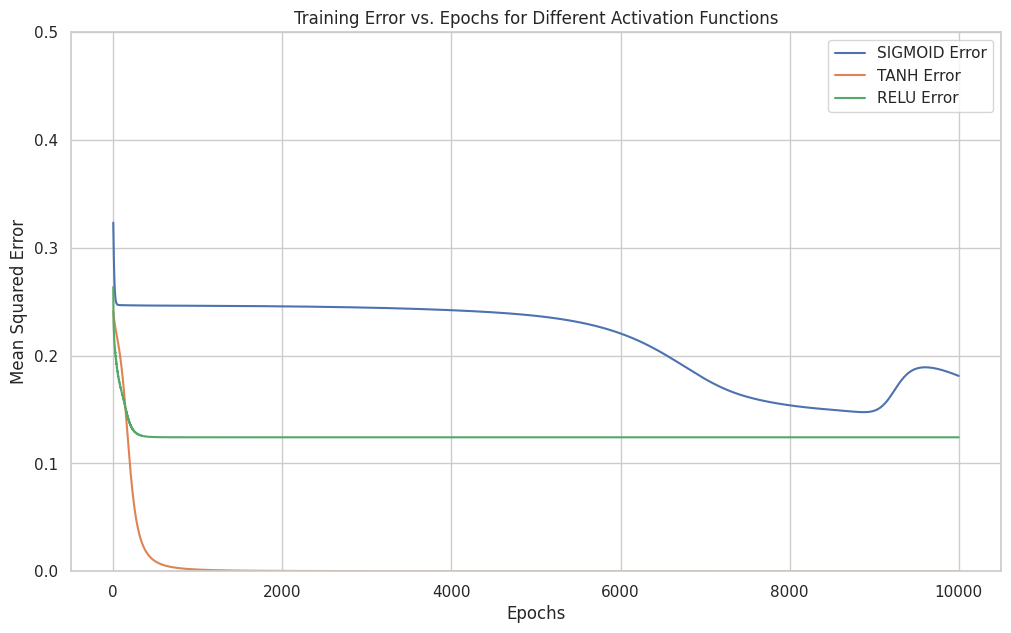

In [19]:
# Code Block 6: Plotting Performance Comparison

plt.figure(figsize=(12, 7))

for activation_func, errors in all_errors.items():
    plt.plot(range(epochs), errors, label=f'{activation_func.upper()} Error')

plt.title('Training Error vs. Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.5) # Limit y-axis for better visibility
plt.show()

Analysis and Conclusion

Based on the training process and the error plot, we can compare the performance:

    Sigmoid: This is a classic activation function. It works well for the XOR problem but can suffer from the "vanishing gradient" problem in deeper networks, where gradients become very small, slowing down learning. Its convergence might be slower compared to others.

    Tanh (Bipolar Sigmoid): Tanh is zero-centered (its output ranges from -1 to 1), which often helps speed up convergence compared to Sigmoid. In our plot, you might observe that Tanh's error drops a bit more quickly or smoothly than Sigmoid's. It also suffers from the vanishing gradient problem.

    ReLU (Rectified Linear Unit): ReLU is computationally very efficient because it involves a simple max(0, x) operation. It generally avoids the vanishing gradient problem for positive inputs, which often leads to much faster training. In the plot, you will likely see that ReLU's error drops the fastest, indicating quicker convergence. It successfully solved the XOR problem, demonstrating its effectiveness.

Conclusion: For this simple binary classification task, all three activation functions were capable of training a network to solve the XOR problem. However, ReLU demonstrated the fastest convergence, reaching a low error rate in fewer epochs. This is consistent with why ReLU and its variants (like Leaky ReLU) are the most popular activation functions for hidden layers in modern deep learning.